3 Network structure visualization
Install the igraph package for R (suggested) or Python. To do so, in R type:1
1 # Download and install the package
2 install . packages (" igraph ")
1. Plot the network using the information in the  le graph subset rank1000.txt. Note that
this is not the complete network, but only a subset of edges between top-ranked products.
By visualizing the graph, you get an idea of the structure of the network you will be working
on. In addition to plotting, comment on anything interesting you observe.
Hints:
• Refer to https://kateto.net/netscix2016.html for a tutorial on igraph and R basics.
• You may  nd it useful to treat this data  le as being in ncol format in igraph.
• It may be simplest to treat the network as undirected for the purposes of visualization
(since directed arrows can add a lot of visual clutter in a graph of this size).
• Playing with the size, color, and layout of objects may make the network easier to
visualize. When plotting you can start with layout=layout.auto and then experiment
with other options. layout=layout.kamada.kawai generally gives good results.
2. Now, use the  le graph subset rank1000 cc.txt to plot only the largest connected compo-
nent in the above network. You should be able to reuse your code from above on the new
data.

In [ ]:
install.packages("igraph")

library(igraph)
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




In [ ]:
# Let's take our text file of space-separated edges and put it into an iGraph graph
graph_subset_rank1000 <- read.graph(file="/content/graph_subset_rank1000.txt", format ="ncol", directed = FALSE)
graph_subset_rank1000

IGRAPH 6c397c0 UN-- 1355 2611 -- 
+ attr: name (v/c)
+ edges from 6c397c0 (vertex names):
 [1] 411653--94292  68951 --478494 236897--265343 236897--265343 236897--472765
 [6] 153184--172503 172503--424919 469074--48638  48638 --480433 220748--42974 
[11] 220748--42974  491768--105110 105110--291610 491768--105110 67371 --78848 
[16] 120884--390297 390297--212405 355494--325446 29203 --349384 349384--20195 
[21] 349384--444150 349384--285340 5039  --246337 325446--21728  21728 --530653
[26] 21728 --265598 355494--21728  216323--354795 45094 --96553  45094 --96553 
[31] 342416--49527  445728--363808 267451--30639  287962--20466  153184--172503
[36] 153184--265468 153184--88060  153184--401507 153184--424919 153184--353676
+ ... omitted several edges

In [ ]:
# How many nodes?
vcount(graph_subset_rank1000)

# How many edges?
ecount(graph_subset_rank1000)

[1] 1355

[1] 2611

In [ ]:
# Get nodes
V(graph_subset_rank1000)

# Get edges
E(graph_subset_rank1000)

+ 1355/1355 vertices, named, from 6c397c0:
   [1] 411653 94292  68951  478494 236897 265343 472765 153184 172503 424919
  [11] 469074 48638  480433 220748 42974  491768 105110 291610 67371  78848 
  [21] 120884 390297 212405 355494 325446 29203  349384 20195  444150 285340
  [31] 5039   246337 21728  530653 265598 216323 354795 45094  96553  342416
  [41] 49527  445728 363808 267451 30639  287962 20466  265468 88060  401507
  [51] 353676 443284 33304  95210  124568 17994  374639 48316  535849 367733
  [61] 83582  30695  468264 84492  225301 572    87559  315493 54800  488883
  [71] 337679 209067 97692  35109  531651 108364 108187 13198  25341  65731 
  [81] 117196 62210  178132 144372 458306 324938 214842 197455 334110 61751 
  [91] 397309 97533  429060 100805 61718  313421 420909 514999 281633 178948
+ ... omitted several vertices

+ 2611/2611 edges from 6c397c0 (vertex names):
 [1] 411653--94292  68951 --478494 236897--265343 236897--265343 236897--472765
 [6] 153184--172503 172503--424919 469074--48638  48638 --480433 220748--42974 
[11] 220748--42974  491768--105110 105110--291610 491768--105110 67371 --78848 
[16] 120884--390297 390297--212405 355494--325446 29203 --349384 349384--20195 
[21] 349384--444150 349384--285340 5039  --246337 325446--21728  21728 --530653
[26] 21728 --265598 355494--21728  216323--354795 45094 --96553  45094 --96553 
[31] 342416--49527  445728--363808 267451--30639  287962--20466  153184--172503
[36] 153184--265468 153184--88060  153184--401507 153184--424919 153184--353676
[41] 153184--443284 153184--33304  153184--95210  124568--17994  17994 --374639
[46] 17994 --48316  17994 --535849 17994 --367733 124568--367733 83582 --30695 
+ ... omitted several edges

In [ ]:
# Is the graph directed?
is.directed(graph_subset_rank1000)

[1] FALSE

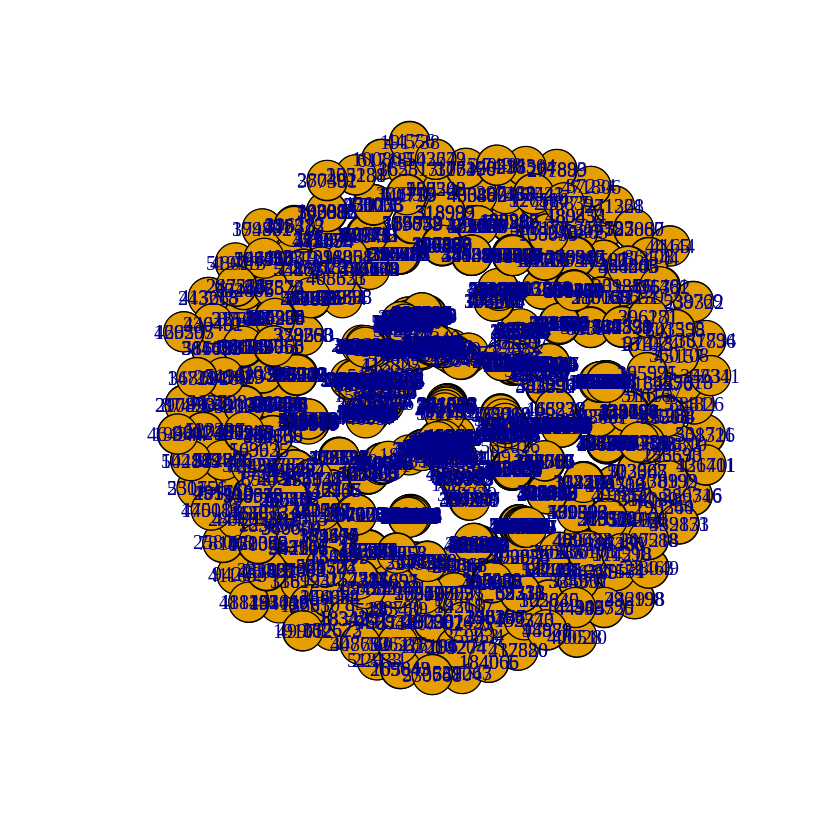

In [ ]:
# Plot using the tutorial starter code
plot.igraph(graph_subset_rank1000)

Plot with the layout.auto option from the directions

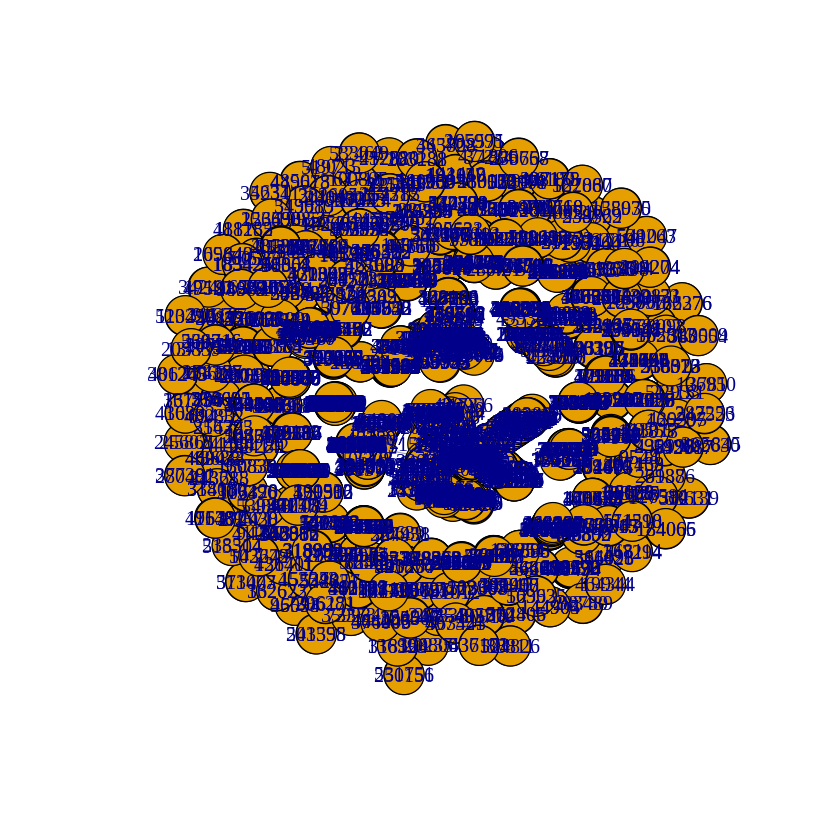

In [ ]:
plot(graph_subset_rank1000, layout = layout.auto(graph_subset_rank1000))


Looking at the shape, we can see an internal cluster of nodes and a ring of outer nodes. Plot a histogram of the distribution of the degrees to examine the structure.

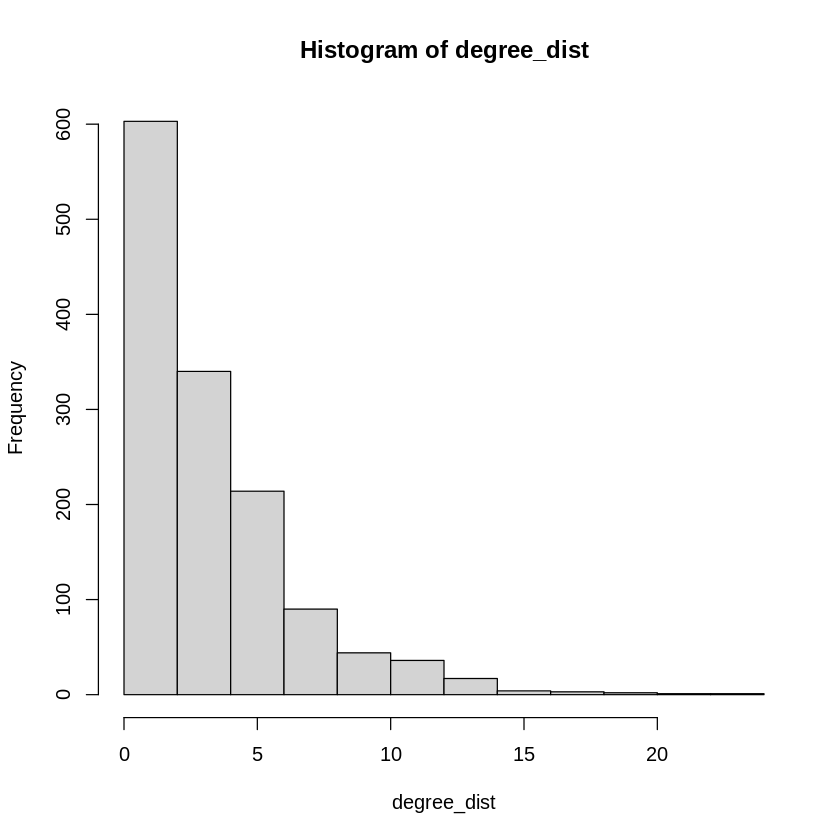

In [ ]:
degree_dist <- degree(graph_subset_rank1000)
hist(degree_dist)


Based on the visual structure, examine the clustering coefficient, or the measure of how the nodes cluster together.

In [ ]:
transitivity(graph_subset_rank1000, type="global")


[1] 0.4106535

Examine the avergae path length, to see how many hops it takes to get from one node to another on average. This number is slightly larger than our "6-degrees of separation" from the earlier assignment

In [ ]:
avg_path_length <- average.path.length(graph_subset_rank1000)
print(avg_path_length)

[1] 8.941834


From the tutorial code, check the betweenness centrality for all nodes, which is the extent a node acts as a bridge between other nodes in the network.

In [ ]:
btw <- betweenness(graph_subset_rank1000)

# I will round it to 2 digits just so that it's easier to read
btw <- round(btw, 2)
btw

411653    94292    68951   478494   236897   265343   472765   153184 
    0.00     0.00     7.00     0.00     0.50     4.86     4.14   195.49 
  172503   424919   469074    48638   480433   220748    42974   491768 
    2.20    53.33     0.00     1.00     0.00     0.00     0.00     0.00 
  105110   291610    67371    78848   120884   390297   212405   355494 
    1.00     0.00     5.00     0.00     0.00     0.00     5.50    14.96 
  325446    29203   349384    20195   444150   285340     5039   246337 
    0.00    14.92    42.82     0.00     4.92    28.42     0.00     3.00 
   21728   530653   265598   216323   354795    45094    96553   342416 
   23.54    50.07     3.50     0.00     0.00     0.00     0.00     1.00 
   49527   445728   363808   267451    30639   287962    20466   265468 
    0.00     0.00     0.00     1.00     0.00    17.00     0.00     0.00 
   88060   401507   353676   443284    33304    95210   124568    17994 
    0.00   181.00     0.97     0.00    31.01     0.00     0.00    17.17 
  374639    48316   535849   367733    83582    30695   468264    84492 
    0.00    27.33     5.67     5.33    25.00    71.00     0.00     0.00 
  225301      572    87559   315493    54800   488883   337679   209067 
   83.00   120.00     1.00     0.00     0.00     5.90   136.44    54.53 
   97692    35109   531651   108364   108187    13198    25341    65731 
  364.54    60.40   211.97     4.18     0.00     0.00    14.19    15.48 
  117196    62210   178132   144372   458306   324938   214842   197455 
    0.00     0.00     0.54    14.99     0.00     0.00     7.86   274.04 
  334110    61751   397309    97533   429060   100805    61718   313421 
   48.25    96.25     6.00    91.00    12.00     0.00     0.00    17.51 
  420909   514999   281633   178948   196224   496408    32865   270504 
   84.00     0.00     6.00    10.29     0.00    10.29     2.38     0.00 
  483960    23117   511354   232354   103588   176612   385251    27798 
   19.00     0.00     0.00    84.00    75.40     7.20    22.20     0.00 
     444   469665   466511   391868   174004   337306   512107    52604 
    0.00     0.00     0.00     0.00     6.40     0.80     5.00    27.41 
  486575    72730   477749   379170    78743   378126   483587     8890 
    0.00     0.33    40.00    42.50     0.00     0.00     3.00     0.00 
   44660   221687   345501   217700   403898   401615    31222   252406 
    0.00     0.00     0.00     3.00     0.00     0.00     0.00     0.00 
  504805   385956   513073   371407   514247    82565   305482   186276 
    0.00    11.00     0.00     0.00    12.00     0.00     0.50     0.00 
  162376   332672   162623   108183      295   372594   419897   436582 
    0.00     0.00     0.00     0.00     2.67     7.17     0.00     0.00 
  308326   531711   511421   364693   386028   525005   427992    78107 
    0.00     0.00     0.00     1.00     0.00     1.00     0.00     0.00 
  258098   169274   413685   243218    34372   477897   146282   497096 
    0.00     0.00     0.00     0.00     0.00     0.00     0.00     1.53 
  171310    53800   359908    88811   524826   400040   213764   424265 
    0.00    43.00    36.00     0.00     0.00     3.14    83.08     0.25 
  521456   424487   520911   146566   514049    83952    68631   352139 
    0.17     1.80     1.57     0.00     0.00     0.00     0.00     0.00 
  138859   526187    79373   173516   186748   252489    39939   522643 
    0.00     5.33     0.00     0.83     9.33     0.00     1.67    29.67 
   76351   166496   475628   360800    20235   485013   449678   231776 
    0.00     0.00    82.00     0.00     0.00     0.00     0.00     0.00 
  160532   221466   490370   476821   224390   343614   384033    53308 
   35.14    12.02     0.00    93.27    26.56     0.00     0.00   161.00 
  262525   368810    29673   509470   292695   184364   134411   371675 
    0.50     0.00     0.00     0.33     0.33     0.33     0.00     0.00 
  236432   440401    87496   210333   297890   297366   1104

In [ ]:
# Sort the betweenness scores
sort(btw)

411653    94292   478494   469074   480433   220748    42974   491768 
    0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00 
  291610    78848   120884   390297   325446    20195     5039   216323 
    0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00 
  354795    45094    96553    49527   445728   363808    30639    20466 
    0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00 
  265468    88060   443284    95210   124568   374639   468264    84492 
    0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00 
  315493    54800   108187    13198   117196    62210   458306   324938 
    0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00 
  100805    61718   514999   196224   270504    23117   511354    27798 
    0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00 
     444   469665   466511   391868   486575    78743   378126     8890 
    0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00 
   44660   221687   345501   403898   401615    31222   252406   504805 
    0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00 
  513073   371407    82565   186276   162376   332672   162623   108183 
    0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00 
  419897   436582   308326   531711   511421   386028   427992    78107 
    0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00 
  258098   169274   413685   243218    34372   477897   146282   171310 
    0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00 
   88811   524826   146566   514049    83952    68631   352139   138859 
    0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00 
   79373   252489    76351   166496   360800    20235   485013   449678 
    0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00 
  231776   490370   343614   384033   368810    29673   134411   371675 
    0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00 
  236432   440401    87496   297890   297366   110480   156448   520302 
    0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00 
  253283   167549   366503   130716   478239    91675   316167   190262 
    0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00 
  297025   410011    61601    69628   106165    17191    38946   423660 
    0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00 
  217520   432880   297824   246223   271368   241221   241268    74288 
    0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00 
  493335   208418   511709   262966   245865    25602   312435   245167 
    0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00 
  531751   250156   441419   194157    58663   112822    20771   540933 
    0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00 
  461680   100533   118155   481282   183897   225066   210313   538546 
    0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00 
    3987   201386   214427   162082   540367   519675   285552   164740 
    0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00 
  519715    48023   540230   171675   342211   344308   231735   534553 
    0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00 
  262852    75113   456008   513131    22933   432998   296198    44444 
    0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00 
    4165   238936   447339   141133   512621   281278    54065   541365 
    0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00 
  542090    73768   274142   538769   239322    73437       20   426430 
    0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00 
  107899   420860    16854   312068   241213   539263   541047   423769 
    0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00 
   72062    86167     7082   510961   167836   331794    523

In [ ]:
# Get the unique values of betweenness scores, and their count; we'll use a dataframe so the result is easier to read
data.frame(table(btw))

btw,Freq
<fct>,<int>
0,764
0.1,5
0.11,1
0.14,1
0.17,2
0.2,4
0.21,1
0.25,2
0.33,6


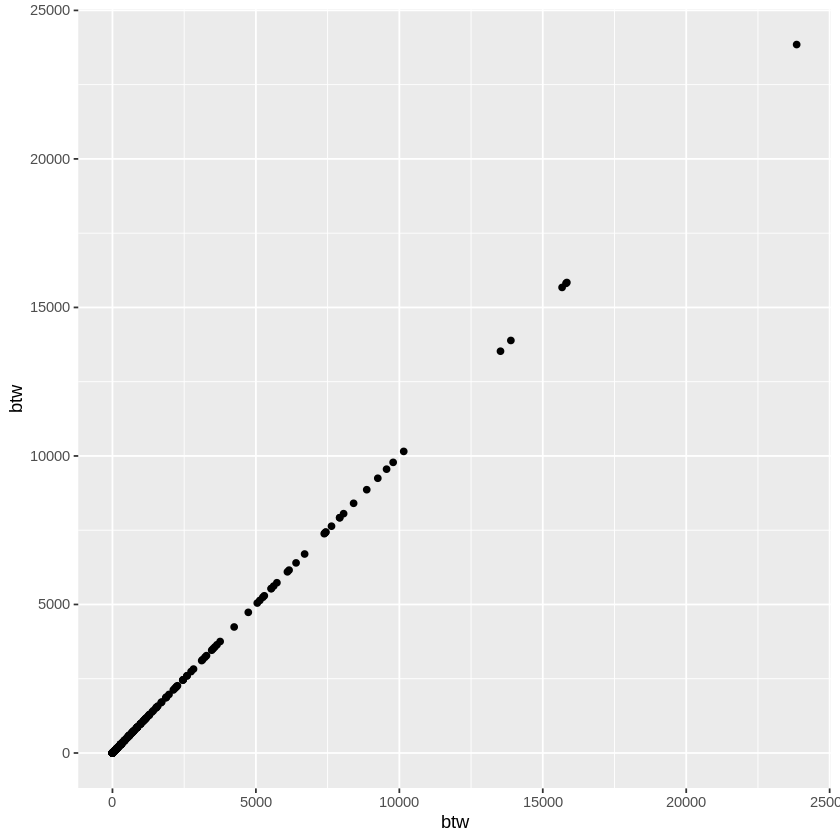

In [ ]:
# For illustrating how to use ggplot, let's just make a nonsensical scatterplot of betweenness against itself
ggplot(data.frame(btw), aes(x=btw, y=btw)) + geom_point()

`geom_smooth()` using formula = 'y ~ x'


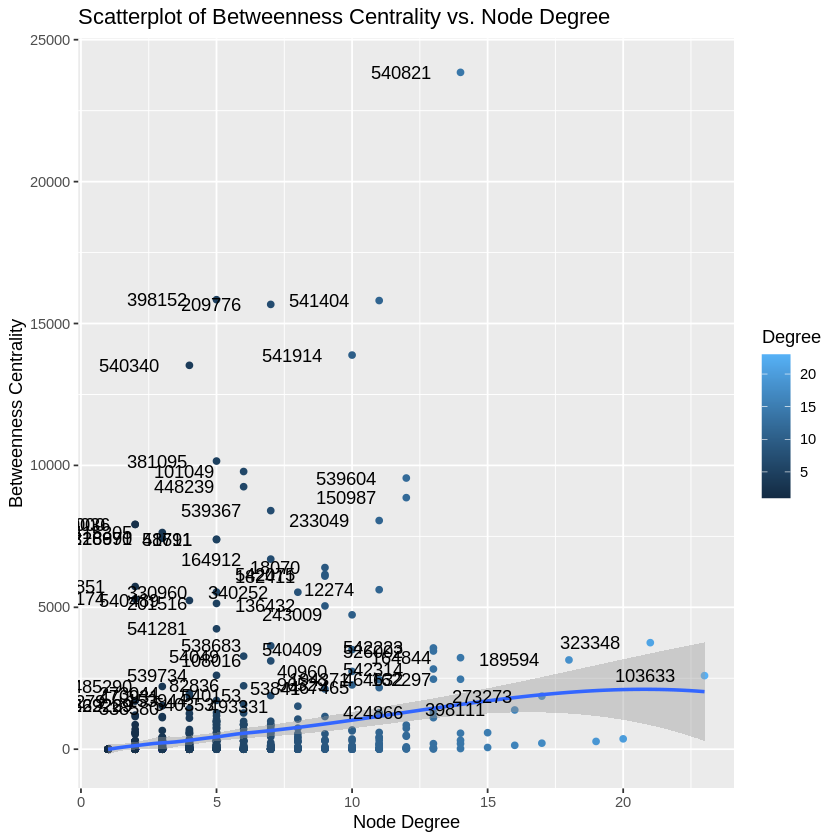

In [ ]:
# Refine the plot

# Calculate the degree of each node
node_degree <- degree(graph_subset_rank1000)

# Create a data frame
df <- data.frame(Degree = node_degree, Betweenness = btw)

# Establish a threshold for the plot
threshold <- quantile(btw, 0.95, na.rm = TRUE)

# Create ggplot
ggplot(df, aes(x=Degree, y=Betweenness)) +
  geom_point(aes(color = Degree)) +  # Color by Degree
  geom_smooth(method = 'loess') +    # Add smoothed line
  geom_text(aes(label=ifelse(Betweenness > threshold, as.character(rownames(df)), '')), hjust=1.5, vjust=0.5) +  # Label extreme points
  labs(title = "Scatterplot of Betweenness Centrality vs. Node Degree",
       x = "Node Degree",
       y = "Betweenness Centrality")


Use kamada kawai layout from the assignment suggestions

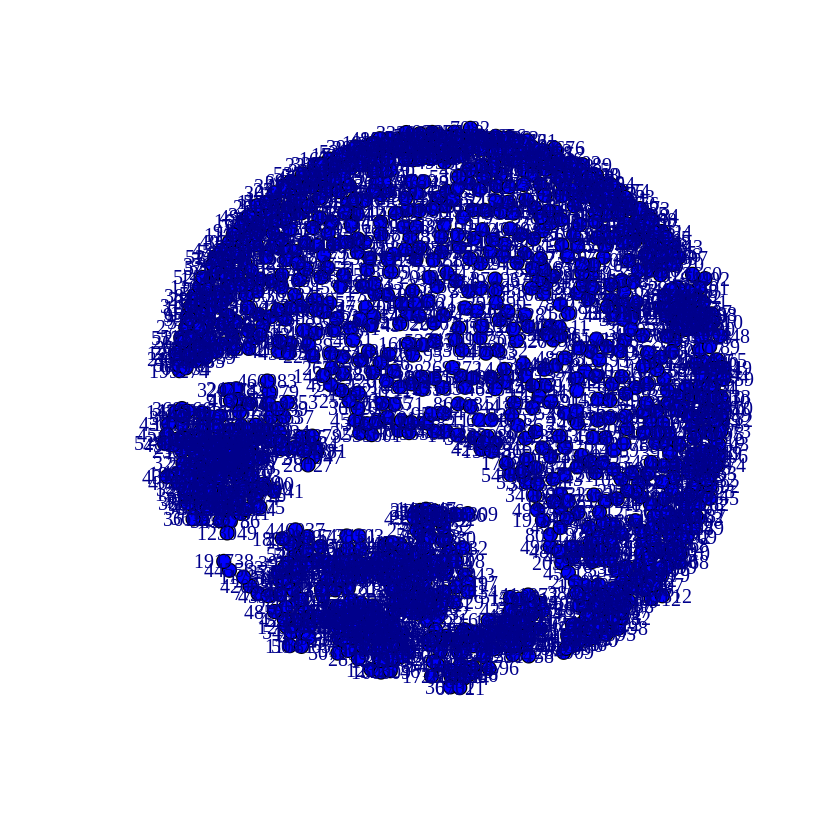

In [ ]:
plot(graph_subset_rank1000, layout = layout.kamada.kawai(graph_subset_rank1000), vertex.size = 5, vertex.color = "blue", edge.color = "grey")

Extract and plot the largest connected component

[1] "Largest connected component: "


[1] 57

<NA> 
  NA

[1] "Indices of the nodes that belong to the largest connected component: "


415305 112822 297722 116802 182411 539734 273044 267500 539367 538785 538546 
   282    283    289    290    291    292    293    294    305    306    307 
540230 540153 539964 516279 542414 171675 541064 447339  82836  48611  73768 
   327    328    329    330    331    332    333    351    352    353    367 
274142  95554  73437  75527 426430 312068 128602 135171 241213 381095  12274 
   368    371    372    375    376    386    387    388    389    394    395 
541914 198466 423769   1299 136432 529269 262229 540409 111494  52374 539257 
   396    397    398    399    400    401    402    411    412    413    414 
539854 419575 340252 485290 185121 111591 201516  63986 150174 420056  77548 
   415    416    417    420    421    448    449    450    451    485    486 
440768 190050  55147  92686 510545 313436 462332  11731 287328 433974 233148 
   494    495    496    520    521    524    525    530    533    551    552 
330960 345354 454037 398931  96529 463542 178396 273273 541902 135011 113827 
   553    579    580    613    614    615    616    617    618    619    620 
372908 538640 188833 139989 541281 541371 150987 338680 370635  51791 540248 
   622    623    624    625    626    627    628    629    630    631    632 
243066 539088 265550 480146 116030 539872 178718 327275 239251 542314  70526 
   633    634    635    636    637    638    639    640    641    642    643 
111255 139837 541406 213826 538249  42374 333341 247731 319311 274842 480014 
   644    645    646    647    648    649    653    654    655    656    657 
542075  54049  25224  96093 465290  12325 160009 323246 538332 186500 539291 
   658    659    660    661    662    665    666    667    670    671    672 
108016 539604 148772  62957 182465 101049  27008 140534  43746 210141 188843 
   673    678    679    680    681    682    683    684    685    686    687 
 30901 282809 538766 478890 541404 502596 337593 326691 218970 361567 542543 
   920    933    936    937    938    939    942    943    944    949    950 
204658  54055 162297 542590 458804 542450 393789 243009  75554 354417 439172 
   951    952    953    954    955    956    957    958    959    962    963 
173746 478847 205003 402456 169910 103633 439175 383921 448920  31758 461748 
   964    965    966    967    968    969    970    971    972    973    974 
412761 470931 396705 189594 398111 420376 290620 402724  18070 151548  96898 
   975    976    977    978    979    980    981    982    983    984    985 
126849  42420 542392 346851 539512 540823 169797 164844 279062 527136  29916 
   989    990    991    995   1001   1002   1012   1013   1014   1015   1016 
340372  49936  78732 248104 164912 415763 538436 342927 540489 233049 418509 
  1017   1018   1019   1020   1021   1022   1023   1024   1025   1026   1027 
540340 180806 539299  38536 445371 513689 421824 129071  99036 398152 231000 
  1028   1029   1030   1031   1032   1033   1034   1035   1042   1043   1044 
 39355 209776 181008  56077 538683 350432 542523 305161 538580 515338 411870 
  1045   1046   1047   1050   1051   1054   1055   1062   1063   1064   1065 
534356  37534 107238 475334 138497 353434 343364 250884 542161  49832  57785 
  1066   1067   1068   1069   1076   1077   1080   1081   1082   1083   1084 
175830  67321  11681 504765  76311 409122 391613 270945 517203 430953 485086 
  1085   1089   1121   1122   1123   1124   1125   1144   1145   1149   1154 
385358 373610 478634 532372 519551 542460 411872 448239  56835 538329 165278 
  1155   1159   1160   1161   1171   1172   1173   1176   1185   1186   1195 
  6683  38503 135349 271094 261494 445526 108030 539037 540920 541770 540353 
  1196   1198   1199   1200   1218   1219   1220   1221   1222   1223   1224 
183288 326881 189249  88897 282610 209632 539397 540821 336044  58850 267854 
  1225   1226   1227   1236   1247   1284   1293   1298   1299   1300   1301 
406527 135907 541452 446037 507290  15209 218619 542223 144047 234156 220782 
  1306   1307   1328  

[1] "Graph of the largest connected component: "


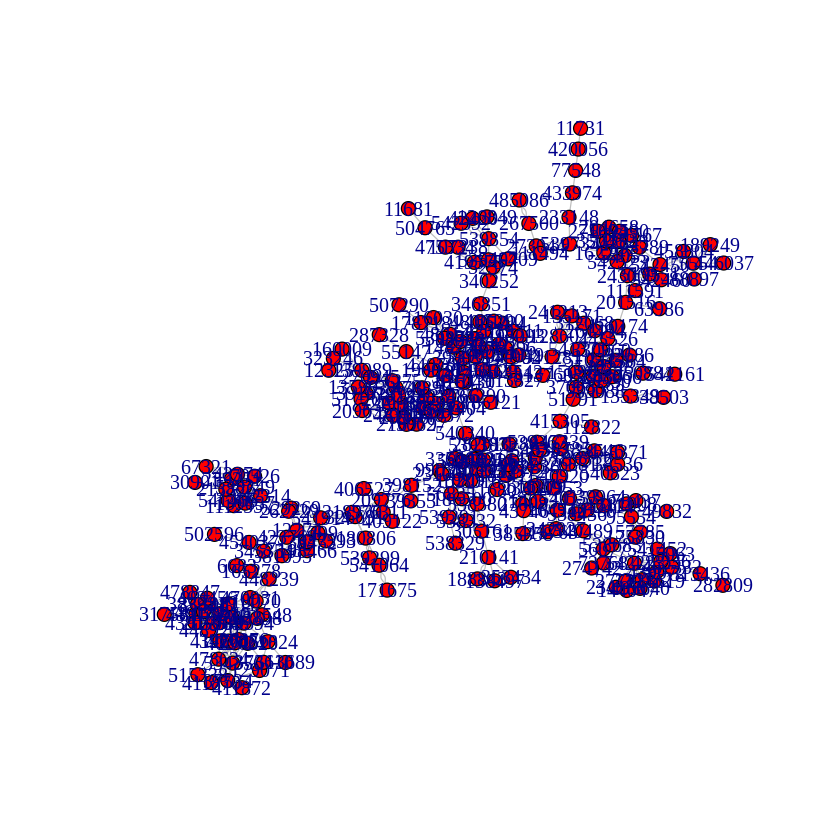

In [ ]:
# Find the connected components in the graph
comps <- components(graph_subset_rank1000)

# Which is the largest component
print("Largest connected component: ")
which.max(comps$csize)

# Get the betweenness scores for node 57
btw[c("57")]

# Find the indices of the nodes that belong to the largest component
print("Indices of the nodes that belong to the largest connected component: ")
which(comps$membership == which.max(comps$csize))

# Create a graph that includes only the nodes that belong to the largest connected component
largest_comp <- induced_subgraph(graph_subset_rank1000, which(comps$membership == which.max(comps$csize)))

# Add colors and plot the graph
print("Graph of the largest connected component: ")
plot(largest_comp, layout = layout.kamada.kawai(largest_comp), vertex.size = 5, vertex.color = "red", edge.color = "grey")


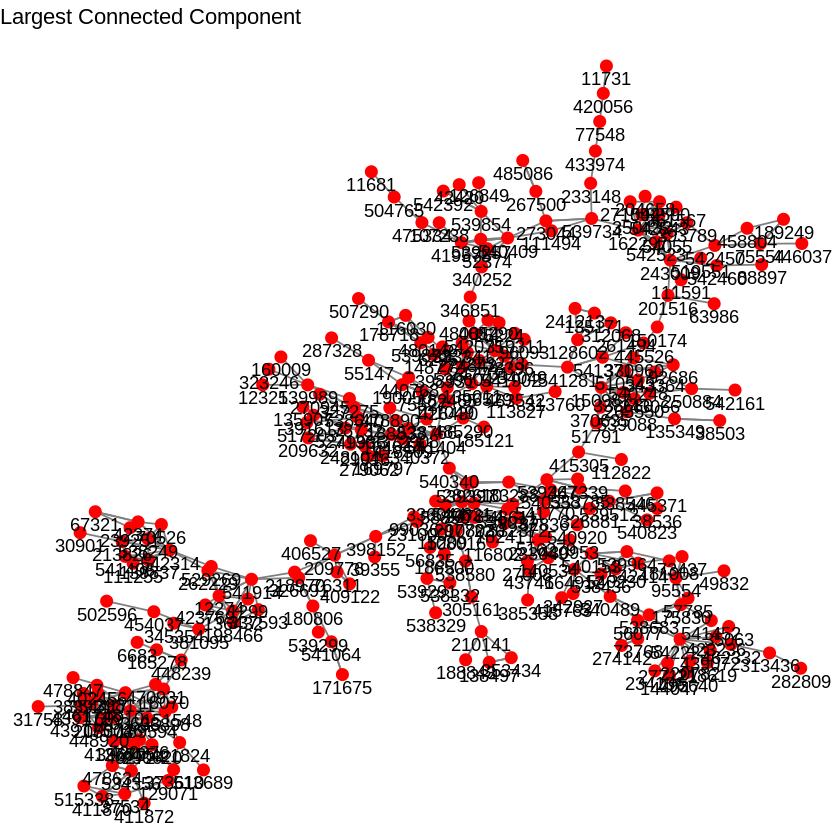

In [ ]:
# Create a data frame for edges
edges_df <- get.data.frame(largest_comp, what="edges")

# Create a data frame for vertices
vertices_df <- data.frame(id = V(largest_comp)$name)

# Calculate layout
layout_matrix <- as.data.frame(layout.kamada.kawai(largest_comp))
colnames(layout_matrix) <- c("x", "y")

# Add layout coordinates to vertices data frame
vertices_df <- cbind(vertices_df, layout_matrix)

# Map layout coordinates to edges data frame
edges_df <- merge(edges_df, vertices_df, by.x="from", by.y="id")
edges_df <- merge(edges_df, vertices_df, by.x="to", by.y="id", suffixes = c("_from", "_to"))

# Create ggplot
ggplot() +
  geom_segment(data=edges_df, aes(x=x_from, y=y_from, xend=x_to, yend=y_to), color="grey50") +
  geom_point(data=vertices_df, aes(x=x, y=y), color="red", size=3) +
  geom_text(data=vertices_df, aes(x=x, y=y, label=id), vjust=1.5, hjust=0.5) +
  labs(title="Largest Connected Component") +
  theme_void()
